<a href="https://colab.research.google.com/github/ankith5980/qrapp/blob/master/TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data=pd.read_csv('/content/train_ctrUa4K.csv')
data=pd.read_csv('/content/test_lAUu6dG.csv')

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


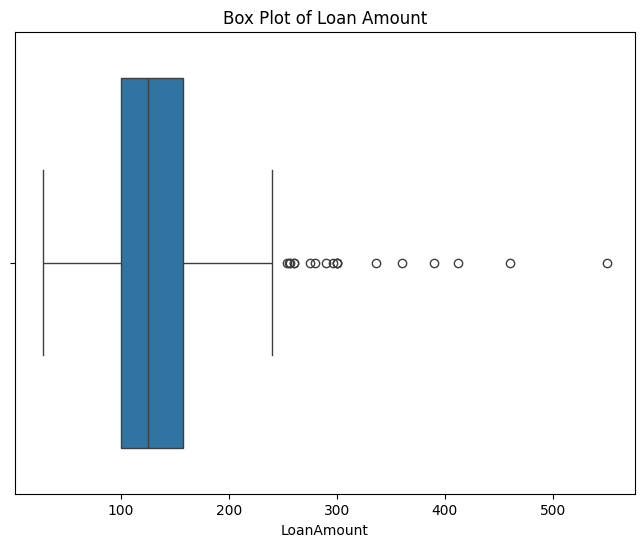

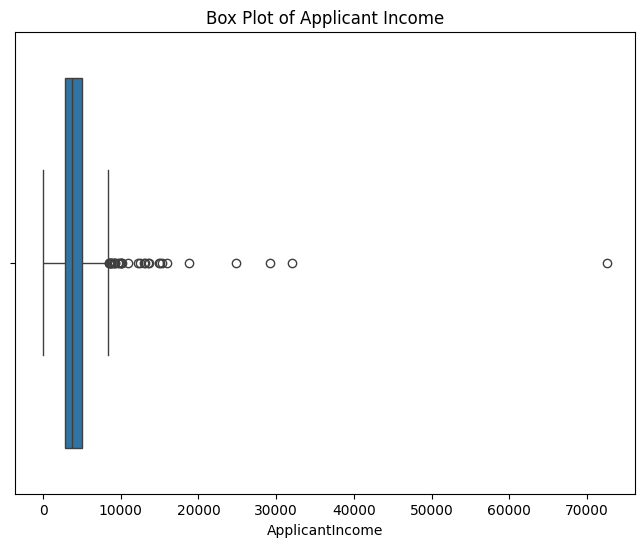

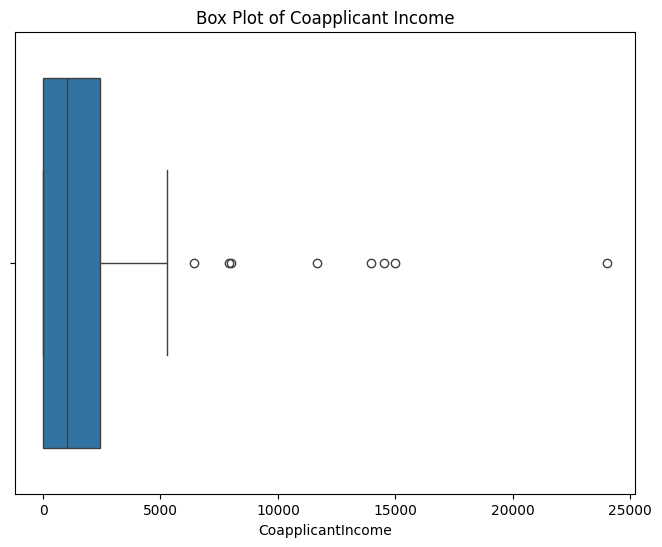

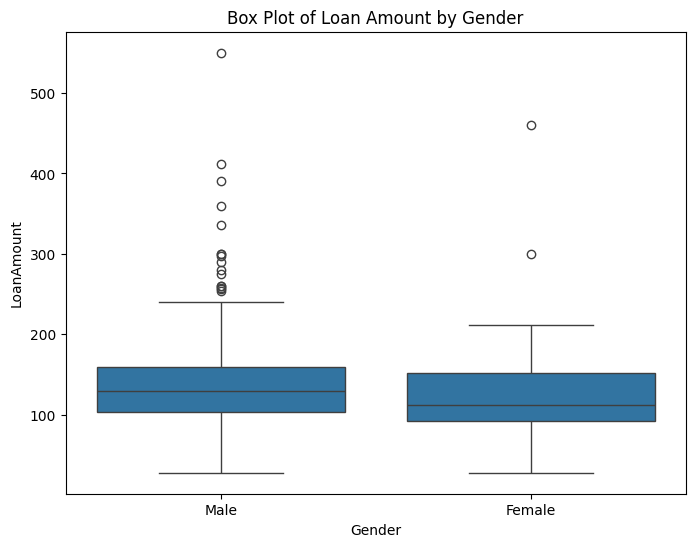

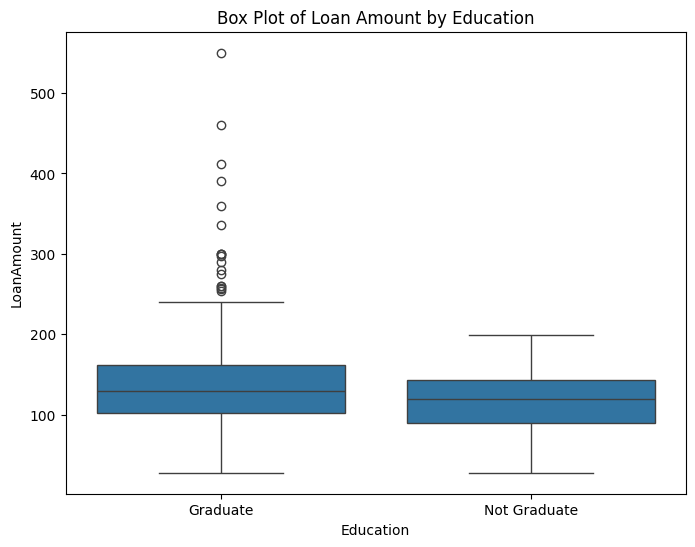

In [ ]:
# box plot

# Box plot for LoanAmount
plt.figure(figsize=(8, 6))
sns.boxplot(x='LoanAmount', data=data)
plt.title('Box Plot of Loan Amount')
plt.show()

# Box plot for ApplicantIncome
plt.figure(figsize=(8, 6))
sns.boxplot(x='ApplicantIncome', data=data)
plt.title('Box Plot of Applicant Income')
plt.show()

# Box plot for CoapplicantIncome
plt.figure(figsize=(8, 6))
sns.boxplot(x='CoapplicantIncome', data=data)
plt.title('Box Plot of Coapplicant Income')
plt.show()

# Box plot for LoanAmount grouped by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='LoanAmount', data=data)
plt.title('Box Plot of Loan Amount by Gender')
plt.show()

# Box plot for LoanAmount grouped by Education
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='LoanAmount', data=data)
plt.title('Box Plot of Loan Amount by Education')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# again loading the data set for model buliding
train_data = pd.read_csv('/content/train_ctrUa4K.csv')
test_data = pd.read_csv('/content/test_lAUu6dG.csv')

# Fill missing categorical values with the most frequent value (mode)
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)

# Fill missing numerical values with the median
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(), inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

# Encode the target variable 'Loan_Status'
train_data['Loan_Status'] = train_data['Loan_Status'].map({'Y': 1, 'N': 0})

# Split the training data into features (X) and target (y)
X = train_data.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_data['Loan_Status']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features for logistic regression
scaler = StandardScaler()

# List of numerical columns to scale
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Fit the scaler on the training data and transform
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

<ipython-input-10-4b802ea98c07>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].mode()[0], inplace=True)
<ipython-input-10-4b802ea98c07>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
#chooseing the model and printing the accuracy
# Define logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training set
logreg.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = logreg.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Prepare the test data for predictions
X_test = test_data.drop(columns=['Loan_ID'])

# Make predictions on the test data
test_predictions = logreg.predict(X_test)

# Convert predictions to 'Y'/'N' for submission
test_data['Loan_Status'] = label_encoder.inverse_transform(test_predictions)

Accuracy: 78.86%
Confusion Matrix:
[[18 25]
 [ 1 79]]


In [ ]:
# hyper tunning the model for better result
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Scale numerical features for logistic regression
scaler = StandardScaler()

# List of numerical columns to scale
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Fit the scaler on the training data and transform
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

# Define logistic regression model and hyperparameter grid
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Hyperparameter tuning for regularization
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse of regularization)
    'penalty': ['l1', 'l2'],  # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear']  # liblinear supports both L1 and L2
}

# Grid search to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the tuned logistic regression model
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy after tuning: {accuracy * 100:.2f}%")

# Display confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy after tuning: 78.86%
Confusion Matrix:
[[18 25]
 [ 1 79]]


In [ ]:
test_data = pd.read_csv('/content/test_lAUu6dG.csv')

In [ ]:


# Assuming you have already executed the code in the previous cell and have the 'model' trained.

# Fill missing values in test data (similar to training data)
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)

test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(), inplace=True)


# Encode categorical variables in test data
label_encoder = LabelEncoder()
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    test_data[column] = label_encoder.fit_transform(test_data[column])


# Prepare test data for prediction
X_test = test_data.drop(columns=['Loan_ID'])  # Remove Loan_ID as it's not a feature

# Scale numerical features in test data using the same scaler fitted on training data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Make predictions on the test data
test_predictions = best_logreg.predict(X_test)

# Create a new DataFrame with Loan_ID and predicted Loan_Status
submission_df = pd.DataFrame({'Loan_ID': test_data['Loan_ID'], 'Loan_Status': test_predictions})

# Map the predicted Loan_Status back to 'Y' and 'N'
submission_df['Loan_Status'] = submission_df['Loan_Status'].map({1: 'Y', 0: 'N'})


# Save the predictions to a CSV file
submission_df.to_csv('loan_prediction_submission.csv', index=False)

print("Predictions saved to loan_prediction_submission.csv")

Predictions saved to loan_prediction_submission.csv


<ipython-input-15-4868c29b81b1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[column].fillna(test_data[column].mode()[0], inplace=True)
<ipython-input-15-4868c29b81b1>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load the training data
train_data = pd.read_csv('/content/train_ctrUa4K.csv')

# Fill missing categorical values with the most frequent value (mode)
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)

# Fill missing numerical values with the median
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    label_encoders[column] = le  # Save the label encoder for each column

# Encode the target variable 'Loan_Status'
train_data['Loan_Status'] = train_data['Loan_Status'].map({'Y': 1, 'N': 0})

# Split the training data into features (X) and target (y)
X = train_data.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_data['Loan_Status']

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = xgb_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Now let's prepare the test dataset and make predictions

# Load the test data
test_data = pd.read_csv('/content/test_lAUu6dG.csv')

# Fill missing values in test data (similar to training data)
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)

test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(), inplace=True)

# Encode categorical variables in test data
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    # If a category in the test data was not seen in training, replace it with the most frequent category
    test_data[column] = test_data[column].apply(lambda x: x if x in label_encoders[column].classes_ else 'Missing')
    label_encoders[column].classes_ = np.append(label_encoders[column].classes_, 'Missing')  # Add 'Missing' class
    test_data[column] = label_encoders[column].transform(test_data[column])

# Prepare test data for prediction
X_test = test_data.drop(columns=['Loan_ID'])

# Scale numerical features in test data using the same scaler fitted on training data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Make predictions on the test data
y_pred_test = xgb_model.predict(X_test)

# Create a new DataFrame with Loan_ID and predicted Loan_Status
submission_df = pd.DataFrame({'Loan_ID': test_data['Loan_ID'], 'Loan_Status': y_pred_test})

# Map the predicted Loan_Status back to 'Y' and 'N'
submission_df['Loan_Status'] = submission_df['Loan_Status'].map({1: 'Y', 0: 'N'})
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Save the predictions to a CSV file
submission_file = 'loan_prediction_xgboost_submission.csv'
submission_df.to_csv(submission_file, index=False)

print(f"Predictions saved to {submission_file}")

Validation Accuracy: 73.98%
Validation Accuracy: 73.98%
Predictions saved to loan_prediction_xgboost_submission.csv


<ipython-input-17-b0dc9acd986c>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].mode()[0], inplace=True)
<ipython-input-17-b0dc9acd986c>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best Score: 0.8146540974612201


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:00:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
